# COVID-19 Data Analysis Project

## Introduction

Coronavirus disease (COVID-19) is an infectious disease caused by the SARS-CoV-2 virus. COVID-19 can be severe, and has caused millions of deaths around the world as well as lasting health problems in some who have survived the illness. The virus can spread from an infected person’s mouth or nose in small liquid particles when they cough, sneeze, speak or breathe. 

Pandemic has been spread all over the world for the last few years. It has become very important to understand about this spread.

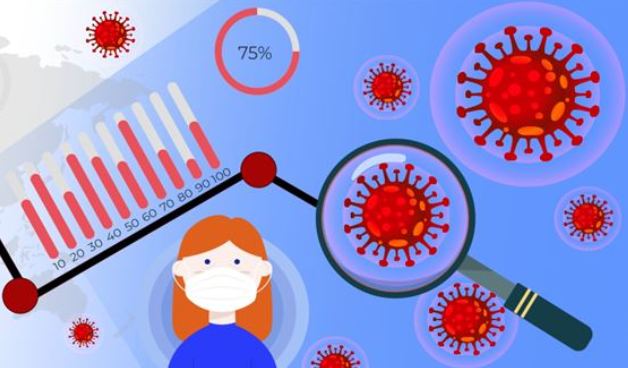

## Problem Statement

Utilize Covid-19 data to comprehend the global impact of the pandemic by examining key indicators such as daily new cases and deaths. Extract valuable insights from the data and conduct a comprehensive analysis, focusing on your specific country.

## Data Pre-processing

Loading the raw data using pandas and carrying out processing steps for structuring the data it inorder to make it ready for the actual analysis.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')#By doing this we can ignore the warnings

In [2]:
# Upload the raw-data 
raw_data = pd.read_csv('covid-data.csv')

In [3]:
# Observing the first 10 records from the raw-data
raw_data.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
5,AFG,Asia,Afghanistan,2020-01-08,NaN,0.0,0.0,NaN,0.0,0.0,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
6,AFG,Asia,Afghanistan,2020-01-09,NaN,0.0,0.0,NaN,0.0,0.0,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
7,AFG,Asia,Afghanistan,2020-01-10,NaN,0.0,0.0,NaN,0.0,0.0,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
8,AFG,Asia,Afghanistan,2020-01-11,NaN,0.0,0.0,NaN,0.0,0.0,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
9,AFG,Asia,Afghanistan,2020-01-12,NaN,0.0,0.0,NaN,0.0,0.0,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [4]:
# Finding the total number of rows and columns in the raw-data
raw_data.shape 

(313273, 67)

In [5]:
# There are 313273 rows and 67 columns in the raw-data

In [6]:
# Columns in the raw-data
raw_data.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [7]:
# Selecting the columns required for our analysis purpose and storing it as data 
data = raw_data[['continent', 'location', 'date', 'population', 'new_cases', 'new_deaths']]

In [8]:
# Observing first 5 records from the data
data.head()

,continent,location,date,population,new_cases,new_deaths
0,Asia,Afghanistan,2020-01-03,41128772.0,0.0,0.0
1,Asia,Afghanistan,2020-01-04,41128772.0,0.0,0.0
2,Asia,Afghanistan,2020-01-05,41128772.0,0.0,0.0
3,Asia,Afghanistan,2020-01-06,41128772.0,0.0,0.0
4,Asia,Afghanistan,2020-01-07,41128772.0,0.0,0.0


In [9]:
# Checking for duplicate entries
data[data.duplicated()]

,continent,location,date,population,new_cases,new_deaths


In [10]:
# There are no duplicate entries in this data

In [11]:
# Finding the number of rows and columns in the data
data.shape

(313273, 6)

In [12]:
# This data has 313273 rows and 6 columns

In [13]:
# Finding null values if present in this data
data.isna().sum()

continent     14899
location          0
date              0
population        0
new_cases      8888
new_deaths     8821
dtype: int64

In [14]:
# Viewing unique values in continent column
data['continent'].unique()

array(['Asia', nan, 'Europe', 'Africa', 'Oceania', 'North America',
       'South America'], dtype=object)

In [15]:
# Observing entries under location column when continent is null
data[data['continent'].isna()]['location'].unique()

array(['Africa', 'Asia', 'Europe', 'European Union', 'High income',
       'Low income', 'Lower middle income', 'North America', 'Oceania',
       'South America', 'Upper middle income', 'World'], dtype=object)

In [16]:
# We found that location entries are inappropriate when continent is null, so we can go ahead and drop these rows
# Also we will be dropping rows having no entries of new_cases or new_deaths, as it does not support our analysis

In [17]:
# Deleting rows having null values 
data.dropna(inplace = True)

In [18]:
# Confirming if all null values are deleted successfully
data.isna().sum()

continent     0
location      0
date          0
population    0
new_cases     0
new_deaths    0
dtype: int64

In [19]:
data.shape

(289490, 6)

In [20]:
# Our processed data is left with 289490 rows and 6 columns which will be utilised for our further analysis 

In [21]:
# Identifying the data types of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 289490 entries, 0 to 313272
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   continent   289490 non-null  object 
 1   location    289490 non-null  object 
 2   date        289490 non-null  object 
 3   population  289490 non-null  float64
 4   new_cases   289490 non-null  float64
 5   new_deaths  289490 non-null  float64
dtypes: float64(3), object(3)
memory usage: 15.5+ MB


In [22]:
# date column must be changed to datetime data type for our convenience
data['date'] = pd.to_datetime(data['date'])

In [23]:
# As we know that any column showing people count must be discrete so changing such columns into int data-type
data[['population', 'new_cases', 'new_deaths']] = data[['population', 'new_cases', 'new_deaths']].astype(int)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 289490 entries, 0 to 313272
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   continent   289490 non-null  object        
 1   location    289490 non-null  object        
 2   date        289490 non-null  datetime64[ns]
 3   population  289490 non-null  int32         
 4   new_cases   289490 non-null  int32         
 5   new_deaths  289490 non-null  int32         
dtypes: datetime64[ns](1), int32(3), object(2)
memory usage: 12.1+ MB


In [25]:
# Checking the descriptive stats of quantitative columns
data.describe().T

,count,mean,std,min,25%,50%,75%,max
population,289490.0,3.391619e+07,1.363708e+08,47.0,372903.0,5434324.0,22125242.0,1.425887e+09
new_cases,289490.0,2.648682e+03,3.887392e+04,0.0,0.0,11.0,348.0,6.966046e+06
new_deaths,289490.0,2.396602e+01,1.436849e+02,0.0,0.0,0.0,4.0,1.144700e+04


In [26]:
# Creating an extra column showing year data inorder to support our analysis
data['year'] = data['date'].dt.year

In [27]:
# Changing the data type of year column to int as its unique information and holds no numerical value as such
data['year'] = data['year'].astype(str)

In [28]:
data.head(10)

,continent,location,date,population,new_cases,new_deaths,year
0,Asia,Afghanistan,2020-01-03,41128772,0,0,2020
1,Asia,Afghanistan,2020-01-04,41128772,0,0,2020
2,Asia,Afghanistan,2020-01-05,41128772,0,0,2020
3,Asia,Afghanistan,2020-01-06,41128772,0,0,2020
4,Asia,Afghanistan,2020-01-07,41128772,0,0,2020
5,Asia,Afghanistan,2020-01-08,41128772,0,0,2020
6,Asia,Afghanistan,2020-01-09,41128772,0,0,2020
7,Asia,Afghanistan,2020-01-10,41128772,0,0,2020
8,Asia,Afghanistan,2020-01-11,41128772,0,0,2020
9,Asia,Afghanistan,2020-01-12,41128772,0,0,2020


## Exploratory Data Analysis

In [29]:
# Exploring the qualitative columns

columns = data[['continent', 'location', 'year']]

for col in columns:
    
    print('For column: ', col, '\n')
    print('Number of unique values are: ', data[col].nunique(), '\n')
    print('Unique values are: ', data[col].unique())
    print('.....................................................................................\n\n')

For column:  continent 

Number of unique values are:  6 

Unique values are:  ['Asia' 'Europe' 'Africa' 'Oceania' 'North America' 'South America']
.....................................................................................


For column:  location 

Number of unique values are:  234 

Unique values are:  ['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Andorra' 'Angola'
 'Anguilla' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan'
 'Bolivia' 'Bonaire Sint Eustatius and Saba' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'British Virgin Islands' 'Brunei' 'Bulgaria'
 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde'
 'Cayman Islands' 'Central African Republic' 'Chad' 'Chile' 'China'
 'Colombia' 'Comoros' 'Congo' 'Cook Islands' 'Costa Rica' "Cote d'Ivoire"
 'Croatia' 'Cuba' 'Curacao' 'Cyprus' 'Czechia'
 'Democratic Repu

In [30]:
# Identifying the date when first entry was recorded
data['date'].min()

Timestamp('2020-01-03 00:00:00')

In [31]:
# Identifying the date when latest entry was recorded
data['date'].max()

Timestamp('2023-05-24 00:00:00')

In [32]:
# We are having the data ranging from Jan 2020 to May 2023

In [33]:
# Year 2023 has values only upto May month and the spread of Covid-19 is least observed this year 
# So we will not be including 2023 in our analysis and will focus only on 2020, 2021 & 2022

data = data[data['year'] != '2023']

In [34]:
data['year'].unique()

array(['2020', '2021', '2022'], dtype=object)

In [35]:
# When was the first case of Covid-19 registered
data[data['new_cases'] > 0]['date'].min()

Timestamp('2020-01-04 00:00:00')

In [36]:
# Records  showing cases registered on 4th Jan 2020
data[(data['date'] == '2020-01-04') & (data['new_cases'] > 0)]

,continent,location,date,population,new_cases,new_deaths,year
54508,Asia,China,2020-01-04,1425887360,1,0,2020
92836,Europe,Finland,2020-01-04,5540745,1,0,2020
101502,Europe,Germany,2020-01-04,83369840,1,0,2020


In [37]:
# When was the first death due to Covid-19 registered
data[data['new_deaths'] > 0]['date'].min()

Timestamp('2020-01-12 00:00:00')

In [38]:
# Records  showing cases registered on 12th Jan 2020
data[(data['date'] == '2020-01-12') & (data['new_deaths'] > 0)]

,continent,location,date,population,new_cases,new_deaths,year
54516,Asia,China,2020-01-12,1425887360,41,1,2020


In [39]:
# Year-wise Covid-19 total cases in the world
year_wise_cases = data.groupby(by = 'year')['new_cases'].sum()
year_wise_cases

year
2020     82936544
2021    204182515
2022    445619830
Name: new_cases, dtype: int32

In [40]:
# Year-wise Covid-19 total deaths in the world
year_wise_deaths = data.groupby(by = 'year')['new_deaths'].sum()
year_wise_deaths

year
2020    1942566
2021    3531354
2022    1240933
Name: new_deaths, dtype: int32

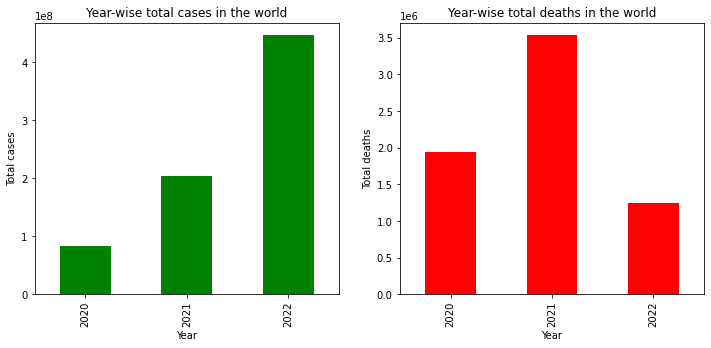

In [41]:
plt.figure(figsize = (12,5))

# Plot showing year-wise Covid-19 cases 
plt.subplot(1, 2, 1)
year_wise_cases.plot(kind = 'bar', color = 'green')
plt.title('Year-wise total cases in the world')
plt.xlabel('Year')
plt.ylabel('Total cases')

# Plot showing year-wise Covid-19 deaths 
plt.subplot(1, 2, 2)
year_wise_deaths.plot(kind = 'bar', color = 'red')
plt.title('Year-wise total deaths in the world')
plt.xlabel('Year')
plt.ylabel('Total deaths')

plt.show()

In [42]:
# Preparing a new data that have necessary information for comparing the countries with respect to the impact of Covid-19
countries_data = pd.DataFrame(data.groupby(by = 'location')['population'].max())
countries_data.columns = ['total_population']
countries_data.head()

,total_population
location,
Afghanistan,41128772
Albania,2842318
Algeria,44903228
American Samoa,44295
Andorra,79843


In [43]:
total_cases = pd.DataFrame(data.groupby(by = 'location')['new_cases'].sum())
total_cases.columns = ['total_cases']
total_cases.head()

,total_cases
location,
Afghanistan,207554
Albania,332768
Algeria,271217
American Samoa,8285
Andorra,47751


In [44]:
total_deaths = pd.DataFrame(data.groupby(by = 'location')['new_deaths'].sum())
total_deaths.columns = ['total_deaths']
total_deaths.head()

,total_deaths
location,
Afghanistan,7849
Albania,3596
Algeria,6881
American Samoa,34
Andorra,158


In [45]:
# Using inner join function to join multiple columns while reference being the location
countries_data = countries_data.join(total_cases, on = 'location', how = 'inner')
countries_data = countries_data.join(total_deaths, on = 'location', how = 'inner')
countries_data.head()

,total_population,total_cases,total_deaths
location,,,
Afghanistan,41128772,207554,7849
Albania,2842318,332768,3596
Algeria,44903228,271217,6881
American Samoa,44295,8285,34
Andorra,79843,47751,158


In [46]:
countries_data['perc_popln_infected'] = (countries_data['total_cases'] / countries_data['total_population']) * 100
countries_data['perc_popln_dead'] = (countries_data['total_deaths'] / countries_data['total_population']) * 100
countries_data.head()

,total_population,total_cases,total_deaths,perc_popln_infected,perc_popln_dead
location,,,,,
Afghanistan,41128772,207554,7849,0.504644,0.019084
Albania,2842318,332768,3596,11.707627,0.126516
Algeria,44903228,271217,6881,0.604003,0.015324
American Samoa,44295,8285,34,18.704143,0.076758
Andorra,79843,47751,158,59.806120,0.197888


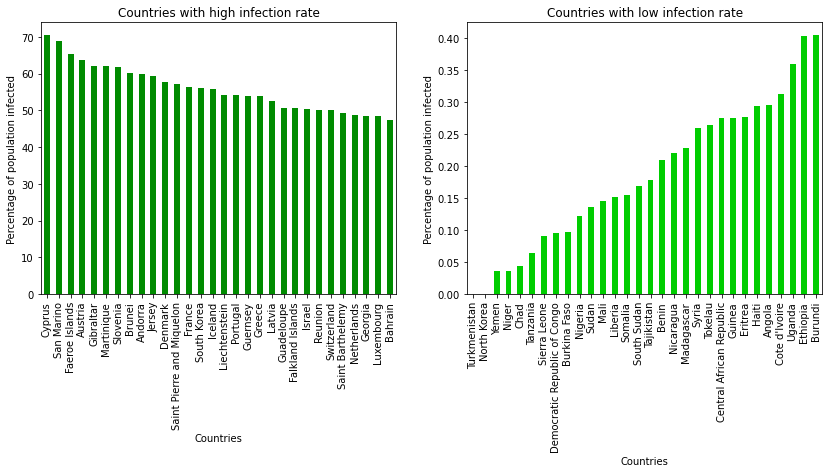

In [47]:
# Top 30 countries with high Covid-19 infection rate
high_infection_rate = countries_data.sort_values(by = 'perc_popln_infected', ascending = False).head(30)

# Top 30 countries with least Covid-19 infection rate
low_infection_rate = countries_data.sort_values(by = 'perc_popln_infected', ascending = True).head(30)

plt.figure(figsize = (14,5))

plt.subplot(1, 2, 1)
high_infection_rate['perc_popln_infected'].plot(kind = 'bar', color = '#008B00')
plt.title('Countries with high infection rate')
plt.xlabel('Countries')
plt.ylabel('Percentage of population infected')

plt.subplot(1, 2, 2)
low_infection_rate['perc_popln_infected'].plot(kind = 'bar', color = '#00CD00')
plt.title('Countries with low infection rate')
plt.xlabel('Countries')
plt.ylabel('Percentage of population infected')

plt.show()

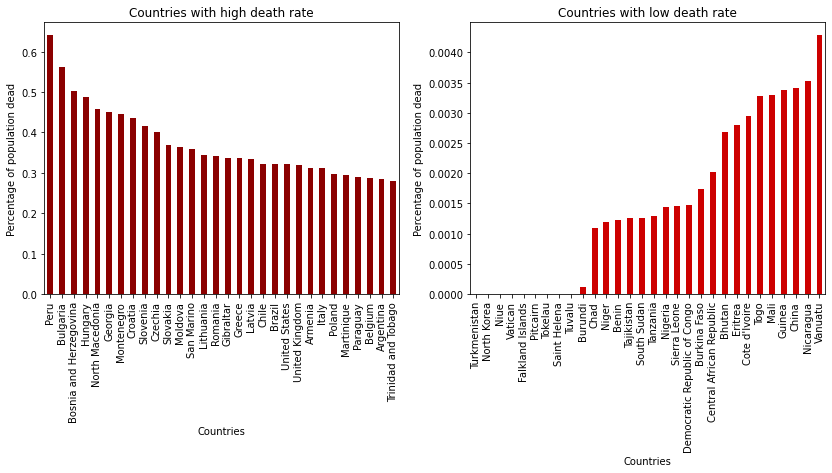

In [48]:
# Top 30 countries with high Covid-19 death rate
high_death_rate = countries_data.sort_values(by = 'perc_popln_dead', ascending = False).head(30)

# Top 30 countries with least Covid-19 death rate
low_death_rate = countries_data.sort_values(by = 'perc_popln_dead', ascending = True).head(30)

plt.figure(figsize = (14,5))

plt.subplot(1, 2, 1)
high_death_rate['perc_popln_dead'].plot(kind = 'bar', color = '#8B0000')
plt.title('Countries with high death rate')
plt.xlabel('Countries')
plt.ylabel('Percentage of population dead')

plt.subplot(1, 2, 2)
low_death_rate['perc_popln_dead'].plot(kind = 'bar', color = '#CD0000')
plt.title('Countries with low death rate')
plt.xlabel('Countries')
plt.ylabel('Percentage of population dead')

plt.show()

In [49]:
# Identifying countries with no cases/deaths registered or no data available.
countries_data[(countries_data['total_cases'] == 0) | (countries_data['total_deaths'] == 0)]

,total_population,total_cases,total_deaths,perc_popln_infected,perc_popln_dead
location,,,,,
Falkland Islands,3801,1923,0,50.591949,0.0
Niue,1952,458,0,23.463115,0.0
North Korea,26069416,0,0,0.000000,0.0
Pitcairn,47,4,0,8.510638,0.0
Saint Helena,5401,2166,0,40.103685,0.0
Tokelau,1893,5,0,0.264131,0.0
Turkmenistan,6430777,0,0,0.000000,0.0
Tuvalu,11335,2779,0,24.516983,0.0
Vatican,808,26,0,3.217822,0.0


# Analysing the Covid-19 data of India

In [50]:
# Filtering the main data to have a new data showing records of Covid-19 impact in India
India_data = data[data['location'] == 'India']
India_data.head(10)

,continent,location,date,population,new_cases,new_deaths,year
125015,Asia,India,2020-01-03,1417173120,0,0,2020
125016,Asia,India,2020-01-04,1417173120,0,0,2020
125017,Asia,India,2020-01-05,1417173120,0,0,2020
125018,Asia,India,2020-01-06,1417173120,0,0,2020
125019,Asia,India,2020-01-07,1417173120,0,0,2020
125020,Asia,India,2020-01-08,1417173120,0,0,2020
125021,Asia,India,2020-01-09,1417173120,0,0,2020
125022,Asia,India,2020-01-10,1417173120,0,0,2020
125023,Asia,India,2020-01-11,1417173120,0,0,2020
125024,Asia,India,2020-01-12,1417173120,0,0,2020


In [51]:
# Finding the shape of Covid-19 data of India
India_data.shape

(1091, 7)

In [52]:
# Oberving the stats of India-data
India_data.describe()

,population,new_cases,new_deaths
count,1.091000e+03,1091.000000,1091.000000
mean,1.417173e+09,40952.463795,486.435380
std,0.000000e+00,72790.351270,826.791916
min,1.417173e+09,0.000000,0.000000
25%,1.417173e+09,2834.500000,29.000000
50%,1.417173e+09,14933.000000,214.000000
75%,1.417173e+09,43451.000000,533.500000
max,1.417173e+09,414188.000000,6148.000000


In [53]:
# Total population of India 
India_data['population'].max()

1417173120

In [54]:
# When was the first Covid-19 case registered in India
India_data[India_data['new_cases'] > 0]['date'].min()

Timestamp('2020-01-30 00:00:00')

In [55]:
# Cases registered on 30th Jan 2020 in India
India_data[India_data['date'] == '2020-01-30']

,continent,location,date,population,new_cases,new_deaths,year
125042,Asia,India,2020-01-30,1417173120,1,0,2020


In [56]:
# When was the first Covid-19 death registered in India
India_data[India_data['new_deaths'] > 0]['date'].min()

Timestamp('2020-03-13 00:00:00')

In [57]:
# Cases registered on 13th Mar 2020 in India
India_data[India_data['date'] == '2020-03-13']

,continent,location,date,population,new_cases,new_deaths,year
125085,Asia,India,2020-03-13,1417173120,8,1,2020


In [58]:
# Total cases registered in India till 13th Mar 2020
India_data[India_data['date'] <= '2020-03-13']['new_cases'].sum()

86

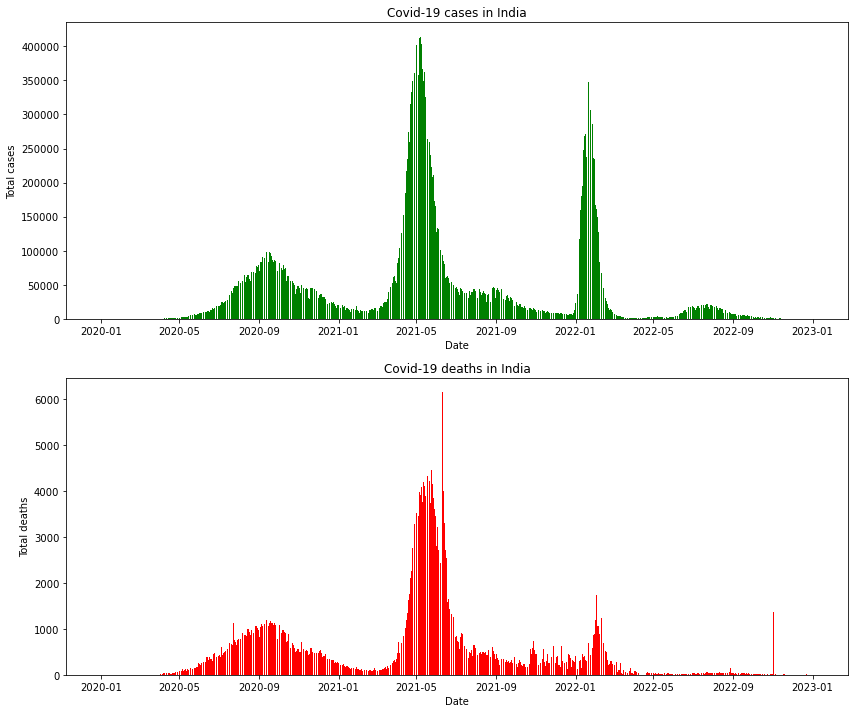

In [59]:
# Identifying the number of Covid-19 waves seen in India
plt.figure(figsize = (14,12))

plt.subplot(2, 1, 1)
plt.bar(x = India_data['date'], height = India_data['new_cases'], color = 'green')
plt.title('Covid-19 cases in India')
plt.xlabel('Date')
plt.ylabel('Total cases')

plt.subplot(2, 1, 2)
plt.bar(x = India_data['date'], height = India_data['new_deaths'], color = 'red')
plt.title('Covid-19 deaths in India')
plt.xlabel('Date')
plt.ylabel('Total deaths')

plt.show()

In [60]:
# Analysing first Covid-19 wave in India which was from June 2020 to Feb 2021
first_wave = India_data[(India_data['date'] >= '2020-06-01') & (India_data['date'] <= '2021-02-28')]

# Total cases in first wave
first_wave_cases = first_wave['new_cases'].sum()

# Total deaths in first wave
first_wave_deaths = first_wave['new_deaths'].sum()

In [61]:
# Analysing second Covid-19 wave in India which was seen from Mar 2021 to Nov 2021
second_wave = India_data[(India_data['date'] >= '2021-03-01') & (India_data['date'] <= '2021-11-30')]

# Total cases in first wave
second_wave_cases = second_wave['new_cases'].sum()

# Total deaths in first wave
second_wave_deaths = second_wave['new_deaths'].sum()

In [62]:
# Analysing second Covid-19 wave in India which was seen from Mar 2021 to Nov 2021
third_wave = India_data[(India_data['date'] >= '2022-01-01') & (India_data['date'] <= '2022-02-28')]

# Total cases in first wave
third_wave_cases = third_wave['new_cases'].sum()

# Total deaths in first wave
third_wave_deaths = third_wave['new_deaths'].sum()

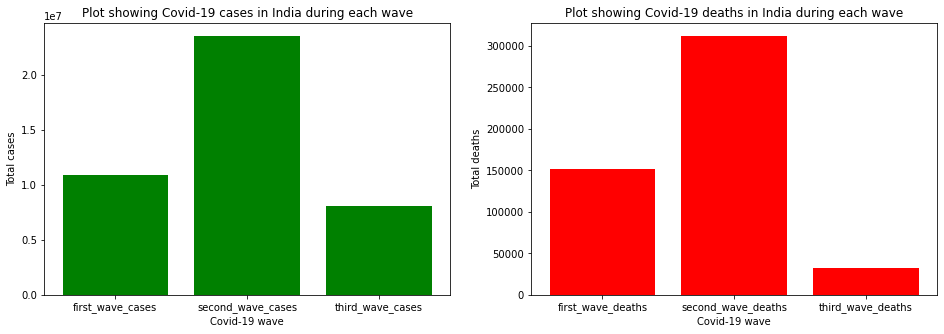

In [63]:
# Comparing all 3 Covid-19 waves in India in terms of total-cases and total-deaths 
cases = [first_wave_cases, second_wave_cases, third_wave_cases]
cases_labels = ['first_wave_cases', 'second_wave_cases', 'third_wave_cases']
deaths = [first_wave_deaths, second_wave_deaths, third_wave_deaths]
death_labels = ['first_wave_deaths', 'second_wave_deaths', 'third_wave_deaths']

plt.figure(figsize = (16,5))

plt.subplot(1, 2, 1)
plt.bar(x = cases_labels, height = cases, color = 'green')
plt.title('Plot showing Covid-19 cases in India during each wave')
plt.xlabel('Covid-19 wave')
plt.ylabel('Total cases')

plt.subplot(1, 2, 2)
plt.bar(x = death_labels, height = deaths, color = 'red')
plt.title('Plot showing Covid-19 deaths in India during each wave')
plt.xlabel('Covid-19 wave')
plt.ylabel('Total deaths')

plt.show()

# Conclusions

1. The first Covid-19 case was reported on January 4th, 2020 in China, Europe, and Germany. During the initial 8-day period, no deaths were recorded until the first death was reported on January 12th, 2020.

2. The year 2022 witnessed the highest number of Covid-19 cases globally, while experiencing the lowest number of deaths. Conversely, the highest number of deaths occurred in 2021.

3. Cyprus had the highest Covid-19 infection rate, with 70.43% of its total population affected, surpassing all other countries. Additionally, Peru had the highest death rate of 0.64%.

4. In India, the first Covid-19 case was registered on January 30th, 2020, which occurred 26 days after the first global case. The first death in India was recorded on March 13th, 2020, approximately 1.5 months after the first case in the country.

5. India experienced three waves of Covid-19, each characterized by a significant spike in cases and deaths. Notably, the second wave had the highest number of cases and deaths compared to the other waves.

# References

Data source: https://ourworldindata.org/ 